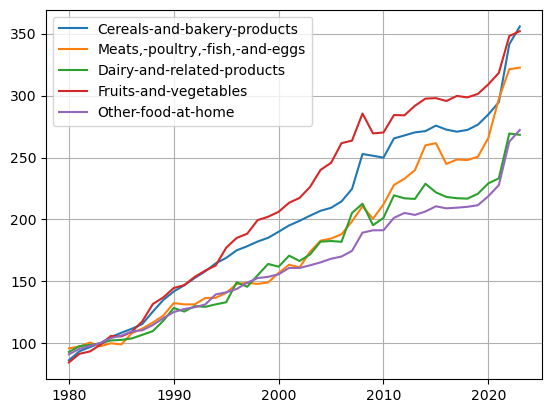

   Cereals-and-bakery-products  Meats,-poultry,-fish,-and-eggs  \
0                         86.4                            96.0   
1                         93.6                            97.4   
2                         97.0                           100.7   
3                        100.1                            97.7   
4                        105.1                           100.1   
5                        108.6                            99.2   
6                        111.8                           108.2   
7                        115.6                           112.0   
8                        125.6                           116.8   
9                        135.0                           122.4   

   Dairy-and-related-products  Fruits-and-vegetables  Other-food-at-home  Year  
0                        93.1                   84.6                91.2  1980  
1                        97.8                   91.6                95.6  1981  
2                        98.8 

In [103]:
## Ran on python 3.9.18
from splinter import Browser # 0.19.0
from bs4 import BeautifulSoup # 4.11.1
import numpy as np # 1.26.0
import pandas as pd # 2.1.1
import matplotlib.pyplot as plt # 3.8.0
## These last imports are important to find appropriate driver to run on chrome version
# the version of selenium and webdriver may be the most important, these version allow for searching for right driver
from selenium import webdriver # 4.11.2
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager # 4.0.1

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# Grab row by ID of category and pull value from that year
def parseRow(page,id):
    row= page.find('tr', attrs={'data-tt-id':id})
    cat = row.find('span',{'class':"fred-rls-elm-nm"})['id'].strip('}')
    val = row.find('td',{'headers':"table-unit-subheading1"}).get_text().split('Index')[0].strip()
    return val, cat

# Dictionary of categories and associated id
catId = {"Cereals-and-bakery-products": "34566",
         "Meats,-poultry,-fish,-and-eggs": "34567",
         "Dairy-and-related-products":"34568",
         "Fruits-and-vegetables":"34569",
         "Other-food-at-home":"34572"}

# start date and end date
endYear = 2023
startYear = 1980
month = 10
day = 1

## Iterate through years, relaoding page each time there is a new year
foodDict = {}
for year in np.arange(startYear,endYear+1,1):
    landing = f'https://fred.stlouisfed.org/release/tables?rid=10&eid=34561&od={year}-{month:02d}-{day:02d}#'
    driver.get(landing)
    html = driver.page_source
    mainPage = BeautifulSoup(html, 'html.parser')
    for cat in catId:
        catVal,foundCat = parseRow(mainPage,catId[cat])
        ## Check that the category ID still matches
        ## To do: implement code to account for changing id (not encountered yet)
        if cat != foundCat:
            print('Doesn\'t work')
        else:
            if foundCat not in foodDict:
                foodDict[foundCat] = []
            foodDict[foundCat].append(float(catVal))

## Create test dataframe, this is just a sample of what we can do with it
test = pd.DataFrame(foodDict)
test['Year'] = np.arange(startYear,endYear+1)
for cat in catId:
    plt.plot(test['Year'],test[cat],label = cat)
plt.legend()
plt.grid()
plt.show()

print(test.head(10))

driver.close()